In [40]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlalchemy as sqla
import sqlite3 as sq
import joblib
import pickle
from sklearn.preprocessing import OrdinalEncoder
import datetime as dt
from sklearn.model_selection import train_test_split

In [41]:
db = sqla.create_engine('sqlite:///zillow.db')

In [42]:
df = pd.read_sql('SELECT * FROM zillow', db, parse_dates=['Date'])

In [43]:
df.head()

,Bedrooms,RegionName,Date,Price
0,0,Memphis,1996-01-31,75490
1,0,Memphis,1996-02-29,75633
2,0,Memphis,1996-03-31,75801
3,0,Memphis,1996-04-30,76142
4,0,Memphis,1996-05-31,76524


In [44]:
df.dtypes

Bedrooms               int64
RegionName            object
Date          datetime64[ns]
Price                  int64
dtype: object

In [45]:
df['Year'] = df['Date'].dt.year
df

,Bedrooms,RegionName,Date,Price,Year
0,0,Memphis,1996-01-31,75490,1996
1,0,Memphis,1996-02-29,75633,1996
2,0,Memphis,1996-03-31,75801,1996
3,0,Memphis,1996-04-30,76142,1996
4,0,Memphis,1996-05-31,76524,1996
...,...,...,...,...,...
642976,5,Braden,2019-11-30,266558,2019
642977,5,Braden,2019-12-31,269833,2019
642978,5,Braden,2020-01-31,271472,2020
642979,5,Braden,2020-02-29,276641,2020


In [46]:
dfNash = df.loc[(df['Bedrooms'] != 0) & (df['RegionName'] == 'Nashville')]


In [47]:
dfNash

,Bedrooms,RegionName,Date,Price,Year
146915,1,Nashville,1996-01-31,79184,1996
146916,1,Nashville,1996-02-29,79502,1996
146917,1,Nashville,1996-03-31,79606,1996
146918,1,Nashville,1996-04-30,80070,1996
146919,1,Nashville,1996-05-31,80458,1996
...,...,...,...,...,...
563141,5,Nashville,2019-11-30,602373,2019
563142,5,Nashville,2019-12-31,605587,2019
563143,5,Nashville,2020-01-31,608967,2020
563144,5,Nashville,2020-02-29,612371,2020


Text(0, 0.5, '$ Price')

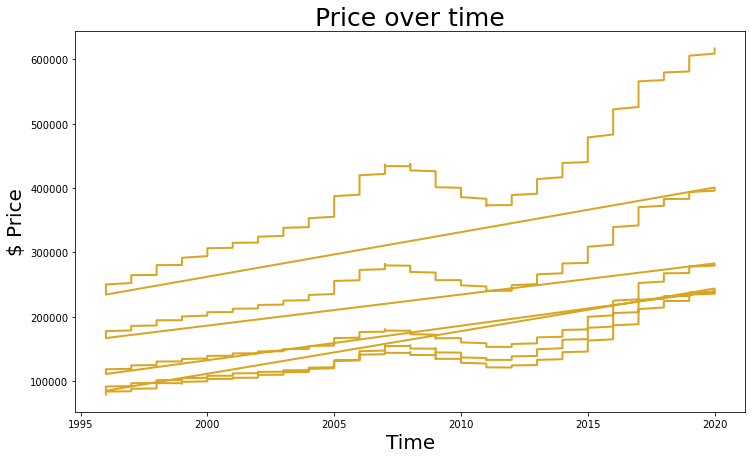

In [48]:
plt.figure(figsize = (12, 7))
plt.plot(dfNash["Year"], dfNash["Price"], 
         color='goldenrod', lw=2)
plt.title("Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [49]:
dfNash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 146915 to 563145
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Bedrooms    1455 non-null   int64         
 1   RegionName  1455 non-null   object        
 2   Date        1455 non-null   datetime64[ns]
 3   Price       1455 non-null   int64         
 4   Year        1455 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 68.2+ KB


In [50]:
features = ['Bedrooms','Year']
output_label = 'Price'

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    dfNash[features],
    dfNash[output_label],
    test_size = 0.3)

In [52]:
x_train.dtypes

Bedrooms    int64
Year        int64
dtype: object

In [53]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
model.score(x_test, y_test)

0.8056906621731479

In [55]:
# Predict() method is used to generate a prediciton
y_pred = model.predict(x_test)
print(y_pred.shape)

(437,)


In [56]:
x_test["Price Predictions"]=y_pred
x_test["Actual Price"]=y_test.values
x_test

,Bedrooms,Year,Price Predictions,Actual Price
562989,5,2007,341174.295349,424871
445425,4,2005,263505.822955,250184
445583,4,2018,359605.751562,382781
562933,5,2002,304212.784346,318800
147010,1,2003,60069.614573,113704
...,...,...,...,...
188030,2,2004,130345.784767,119559
562882,5,1998,274643.575544,268219
563104,5,2016,407705.015155,516077
562891,5,1999,282035.877744,280383


In [57]:
x_test["Difference"]=x_test["Price Predictions"]-x_test["Actual Price"]
Average=x_test["Difference"].values.mean()
Average

-114.98538714318666

In [76]:
data = {
  "Bedrooms": [4],
  'Year': [2025]
  
}

#load data into a DataFrame object:
df2 = pd.DataFrame(data)

print(df2) 

   Bedrooms  Year
0         4  2025


In [77]:
y_test=model.predict(df2)
y_test

array([411351.86696669])

In [60]:
print(model.coef_)
print(model.intercept_)

[62883.86799344  7392.3022006 ]
-14809595.561229605


In [ ]:
# use predict method predict(X) X=all values as a list 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
